In [1]:
import pandas as pd
import sqlite3 

In [2]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Данные о комитах

In [3]:
query = """
SELECT 
    timestamp,
    strftime('%H:%M:%S', timestamp) AS time
FROM checker
WHERE uid LIKE 'user%'
"""
df = pd.read_sql(query, connection)
df

,timestamp,time
0,2020-04-17 05:19:02.744528,05:19:02
1,2020-04-17 05:22:35.249331,05:22:35
2,2020-04-17 05:22:45.549397,05:22:45
3,2020-04-17 05:34:14.691200,05:34:14
4,2020-04-17 05:34:24.422370,05:34:24
...,...,...
3202,2020-05-21 20:19:06.872761,20:19:06
3203,2020-05-21 20:22:41.785725,20:22:41
3204,2020-05-21 20:22:41.877806,20:22:41
3205,2020-05-21 20:37:00.129678,20:37:00


In [4]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
def find_time_of_day(time):
    hour = int(time.split(':')[0])
    if 0 <= hour < 4:
        return 'night'
    elif 4 <= hour < 10:
        return 'morning'
    elif 10 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'
df['daytime'] = df['time'].apply(find_time_of_day)

df_count = df.groupby(['date', 'daytime']).size().unstack().fillna(0)
# df_count.info()
df_count


daytime,afternoon,evening,morning,night
date,,,,
2020-04-17,10.0,0.0,13.0,0.0
2020-04-18,33.0,35.0,1.0,0.0
2020-04-19,16.0,11.0,4.0,2.0
2020-04-20,12.0,13.0,0.0,0.0
2020-04-21,0.0,25.0,0.0,0.0
2020-04-22,4.0,24.0,0.0,0.0
2020-04-23,15.0,20.0,6.0,2.0
2020-04-24,4.0,12.0,0.0,0.0
2020-04-25,33.0,49.0,21.0,1.0


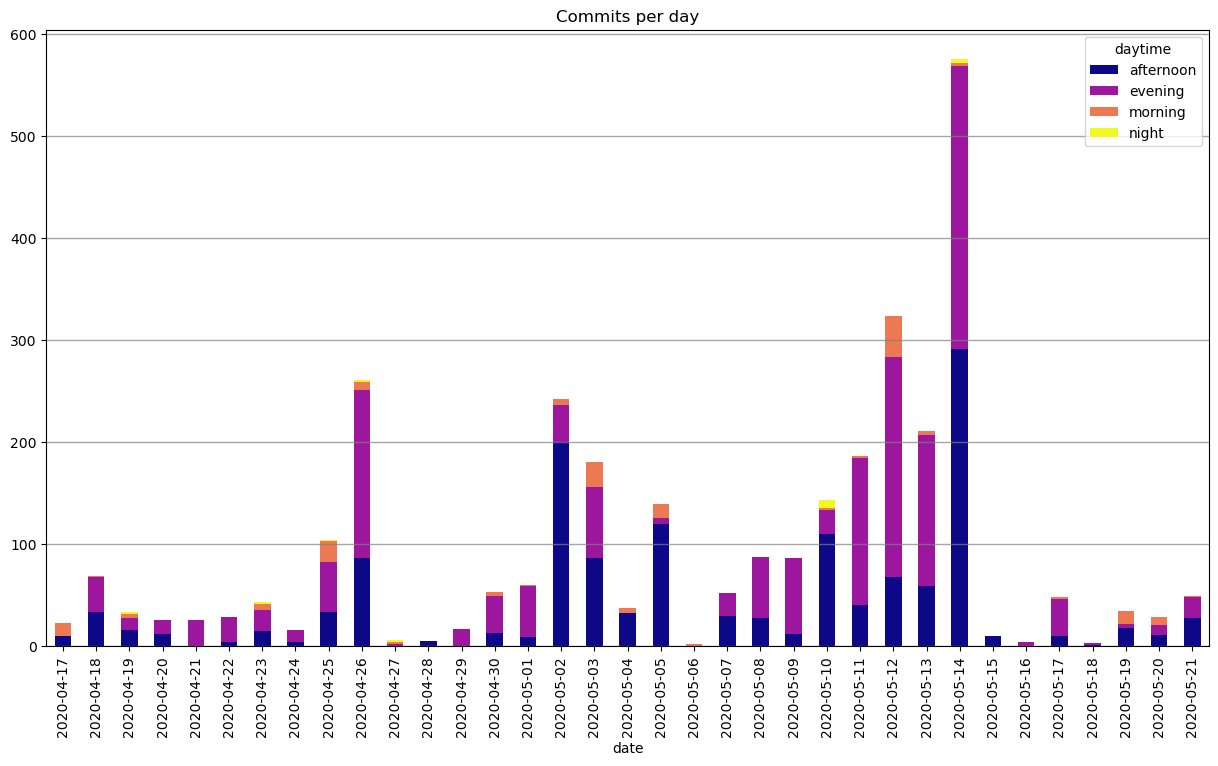

In [5]:
ax = df_count.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    colormap='plasma',
    title='Commits per day'
)

ax.grid(axis='y', linestyle='-', color='gray', alpha=0.7, linewidth=1)
ax.tick_params(axis='x', rotation=90)


## Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днём или вечером?

In [6]:
sum_by_daytime = df_count[['afternoon', 'evening', 'morning', 'night']].sum()
print("Ответ - afternoon и evening")
sum_by_daytime

Ответ - afternoon и evening


daytime
afternoon    1391.0
evening      1611.0
morning       184.0
night          21.0
dtype: float64

## Какой день имеет наибольшее количество коммитов и в то же время количество коммитов вечером выше, чем днём?

In [7]:
max_commits = df_count[(df_count['evening'] > df_count['afternoon'])].sum(axis=1).idxmax()

print(f"Ответ — {max_commits}")

Ответ — 2020-05-12


In [8]:
connection.close()